In [1]:
import os


# Découverte automatique : si MLFlow a été lancé avant Jupyter/VSCode
if "MLFLOW_TRACKING_URI" in os.environ:
    # Si la variable d'environnement MLFLOW_TRACKING_URI existe, l'afficher
    print(os.environ["MLFLOW_TRACKING_URI"])
else:
    # Sinon, afficher un message indiquant que MLflow n'a pas été découvert automatiquement
    print("MLflow was not automatically discovered, a tracking URI must be provided manually.")

https://user-mthomassin-mlflow.user.lab.sspcloud.fr


In [3]:
def log_gsvc_to_mlflow(gscv, mlflow_experiment_name):
    """Log a scikit-learn trained GridSearchCV object as an MLflow experiment."""
    
    # Configurer le contexte de l'expérience MLflow
    mlflow.set_experiment(experiment_name=mlflow_experiment_name)

    for run_idx in range(len(gscv.cv_results_["params"])):
        # Pour chaque combinaison d'hyperparamètres utilisée pour entraîner le modèle, on log une exécution dans MLflow
        run_name = f"run {run_idx}"
        with mlflow.start_run(run_name=run_name):
            # Enregistrer les hyperparamètres
            params = gscv.cv_results_["params"][run_idx]
            for param in params:
                mlflow.log_param(param, params[param])

            # Enregistrer les métriques de fit
            scores = [score for score in gscv.cv_results_ if "mean_test" in score or "std_test" in score]
            for score in scores:
                mlflow.log_metric(score, gscv.cv_results_[score][run_idx])

            # Enregistrer le modèle en tant qu'artifact
            mlflow.sklearn.log_model(gscv, "gscv_model")

            # Enregistrer l'URL des données d'entraînement
            mlflow.log_param("data_url", DATA_URL)


In [ ]:
# log_gsvc_to_mlflow(gscv=pipe_gscv, mlflow_experiment_name="tutorial-mlflow-intro")

In [2]:
!sudo apt-get update
!sudo apt-get install graphviz
!pip install mermaid

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease    
Get:5 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,857 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,084 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,376 kB]
Hit:9 https://apt.postgresql.org/pub/repos/apt jammy-pgdg InRelease            
Fetched 6,702 kB in 2s (2,910 kB/s)                 
Reading package lists... Done
W: https://apt.postgresql.org/pub/repos/apt/dists/jammy-pgdg/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
Reading package lists...

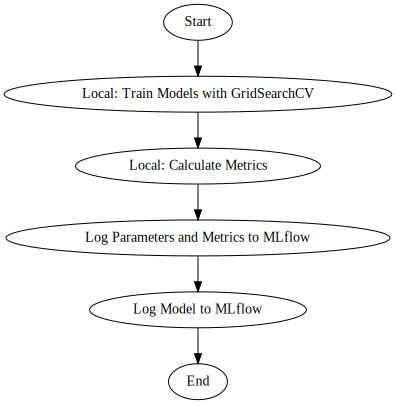

In [7]:
from graphviz import Digraph
from IPython.display import display

# Créer un objet Digraph
dot = Digraph()

# Ajouter des nœuds et des arêtes pour représenter le flux de la fonction
dot.node('A', 'Start')
dot.node('B', 'Local: Train Models with GridSearchCV')
dot.node('C', 'Local: Calculate Metrics')
dot.node('D', 'Log Parameters and Metrics to MLflow')
dot.node('E', 'Log Model to MLflow')
dot.node('F', 'End')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF'])

# Afficher le diagramme directement dans le notebook
display(dot)
